In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''--------- 1. Data Manipulation ---------'''
import numpy as np
import pandas as pd
'''--------- 2. Data Preprocessing ---------'''
from sklearn.preprocessing import LabelEncoder #Encode Non-numeric Var
from sklearn.preprocessing import MinMaxScaler # Feature Scaling
from sklearn.model_selection import train_test_split #Train Test Validation Split
'''--------- 3. Data Visualization ---------'''
import matplotlib.pyplot as plt
'''--------- 4. Model Training ---------'''
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
'''--------- 5. Model Evluation ---------'''
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

2023-06-28 08:45:18.486158: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Dataset
### Dataset 1
**About dataset**
- 900 ~30 second audio clips gathered from AllMusic API
- Annotated into 4 quadrants based on valance and arousal according to Russell's model
- Audios are organized in 4 folders (Q1 to Q4)
- Equally stratified dataset with each classes 250 songs

**Acknowledgements**<br>
Source: http://mir.dei.uc.pt/downloads.html

**If you use it, please cite the following article(s):**

Panda R., Malheiro R. & Paiva R. P. (2018). "Novel audio features for music emotion recognition". IEEE Transactions on Affective Computing (IEEE early access). DOI: 10.1109/TAFFC.2018.2820691.

Panda R., Malheiro R., Paiva R. P. (2018). "Musical Texture and Expressivity Features for Music Emotion Recognition". 19th International Society for Music Information Retrieval Conference -- ISMIR 2018, Paris, France.

In [3]:
# Read dataset1
df1 = pd.read_excel("Features1D/Features/Features.xlsx")
df1

,file,scale,key,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,...,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20,mood
0,Dataset25/MER25/Q1/MT0009845271.mp3,major,C,129.199219,0.122140,0.001837,0.401058,0.082307,2642.221588,271537.203181,...,62.597446,-5.950494,48.630459,1.334569,50.004402,-5.540088,64.204506,1.117945,66.048088,happy
1,Dataset25/MER25/Q1/MT0012742379.mp3,major,A,123.046875,0.083209,0.003111,0.345329,0.090639,1801.451903,139289.262872,...,94.285316,2.379663,45.529087,-0.897912,63.964500,2.081507,75.064636,-6.191793,77.692085,happy
2,Dataset25/MER25/Q1/MT0009188643.mp3,major,E,99.384014,0.153985,0.001419,0.484920,0.081994,3368.652103,605562.058604,...,41.972660,0.604512,55.172565,5.850554,55.045155,-1.423651,46.238407,3.996233,56.848827,happy
3,Dataset25/MER25/Q1/MT0011560587.mp3,major,A,172.265625,0.149997,0.002240,0.312995,0.086087,1318.592756,189719.701093,...,60.148708,-3.539526,72.778801,-4.562426,86.510620,-4.923912,70.068069,-8.135331,110.109657,happy
4,Dataset25/MER25/Q1/MT0001605268.mp3,major,E,92.285156,0.124284,0.001862,0.366223,0.086975,2403.937296,546816.767836,...,50.798794,-11.507196,90.738411,0.821440,52.887070,-6.566545,59.563255,1.389795,53.002163,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,Dataset25/MER25/Q3/MT0010804974.mp3,major,A,135.999178,0.153649,0.003739,0.250131,0.098683,856.545811,118651.564210,...,144.309845,-0.304753,160.793076,2.532327,152.150955,2.110771,163.557083,-2.066999,142.535400,sad
894,Dataset25/MER25/Q3/MT0000796526.mp3,major,B,161.499023,0.086236,0.002395,0.322800,0.089179,2152.750986,730050.006374,...,58.887882,-10.346969,113.920319,1.367891,55.805199,-3.380867,84.275322,-2.286275,78.514404,sad
895,Dataset25/MER25/Q3/MT0015664499.mp3,minor,A#,99.384014,0.107483,0.002811,0.376557,0.105393,1836.995316,545339.380176,...,44.633171,2.953913,43.044193,4.850079,42.006420,-2.364613,38.483833,2.754930,31.010529,sad
896,Dataset25/MER25/Q3/MT0012292188.mp3,minor,G#,107.666016,0.099635,0.001647,0.370873,0.102202,853.677506,131473.967491,...,57.660786,1.490195,56.502377,-0.173234,52.937866,-0.707987,52.222660,-2.389481,50.750061,sad


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   file           898 non-null    object 
 1   scale          898 non-null    object 
 2   key            898 non-null    object 
 3   tempo          898 non-null    float64
 4   rms_mean       898 non-null    float64
 5   rms_var        898 non-null    float64
 6   chroma_mean    898 non-null    float64
 7   chroma_var     898 non-null    float64
 8   centroid_mean  898 non-null    float64
 9   centroid_var   898 non-null    float64
 10  rolloff_mean   898 non-null    float64
 11  roll_off_var   898 non-null    float64
 12  zcr_mean       898 non-null    float64
 13  zcr_var        898 non-null    float64
 14  tonnetz_mean   898 non-null    float64
 15  tonnetz_var    898 non-null    float64
 16  mel_mean       898 non-null    float64
 17  mel_var        898 non-null    float64
 18  mfcc_mean_

In [5]:
df1.describe()

,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,rolloff_mean,roll_off_var,zcr_mean,...,mfcc_mean_16,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,8.980000e+02,898.000000,8.980000e+02,898.000000,...,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,122.192119,0.140620,0.003567,0.376747,0.085305,2059.988511,3.909208e+05,4187.814830,1.675962e+06,0.100632,...,-1.790507,64.153565,-2.054695,65.153429,-2.161143,66.155017,-1.077997,68.366924,-2.015693,72.219889
std,20.708462,0.067875,0.003130,0.093622,0.010212,685.458229,3.273618e+05,1522.875967,1.314115e+06,0.042594,...,5.714870,33.982765,5.854216,37.509313,5.396882,39.399692,5.390178,42.152986,4.876502,47.802374
min,75.999540,0.015824,0.000055,0.131688,0.041983,387.401161,4.007574e+03,523.105966,1.089884e+04,0.019527,...,-23.835148,16.496901,-16.260069,16.212341,-20.297907,15.476705,-17.380840,17.147591,-17.055731,14.376126
25%,107.666016,0.090460,0.001534,0.309014,0.081920,1523.621647,1.572228e+05,3064.712155,6.972916e+05,0.066929,...,-5.492516,42.567407,-6.142178,42.141800,-5.623221,41.091060,-4.471170,43.613956,-4.983186,42.542788
50%,123.046875,0.128408,0.002628,0.362656,0.087398,2078.002781,2.988196e+05,4289.452270,1.360052e+06,0.095536,...,-0.872392,57.365828,-3.344803,55.556923,-1.133976,57.262060,-2.023335,58.444538,-1.465007,59.946037
75%,135.999178,0.184625,0.004582,0.437746,0.091539,2546.979116,5.314662e+05,5360.334807,2.263938e+06,0.128580,...,2.426354,77.580990,1.334129,77.358486,1.951706,78.075478,1.448640,83.002417,1.369652,86.225466
max,198.768029,0.395023,0.023626,0.656680,0.111998,3703.229757,2.775075e+06,7815.641639,8.834975e+06,0.254733,...,16.275961,435.665466,15.933263,514.815186,12.374401,444.994934,16.365273,588.261475,15.270178,551.592407


In [6]:
df1.groupby('mood').mean()

,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,rolloff_mean,roll_off_var,zcr_mean,...,mfcc_mean_16,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20
mood,,,,,,,,,,,,,,,,,,,,,
angry,120.608432,0.195935,0.004543,0.485090,0.075074,2584.532564,344406.472181,5237.362224,1.264628e+06,0.136600,...,-0.930292,44.363887,-1.284212,44.808423,-1.977401,46.113114,0.421466,48.109930,-1.777066,48.157392
happy,123.450826,0.149859,0.003879,0.381774,0.086511,2316.987041,412191.587768,4803.631991,1.607647e+06,0.114884,...,-1.783055,60.065572,-1.757794,60.666303,-1.741446,62.121580,-1.139971,67.214375,-1.887622,69.893941
relaxed,122.453003,0.107175,0.002817,0.318259,0.089239,1663.728268,419919.822595,3368.101718,2.066409e+06,0.074023,...,-1.632271,80.336390,-2.060138,82.309746,-1.813682,86.293389,-1.424376,85.156412,-1.918423,91.165267
sad,122.267405,0.109595,0.003033,0.321909,0.090405,1676.990600,387354.481163,3347.637316,1.764555e+06,0.077147,...,-2.816344,71.812074,-3.113996,72.789358,-3.108311,70.056133,-2.169657,72.976734,-2.478521,79.642282


### Dataset 2
**About dataset**
- 400 ~30 second audio clips gathered from erbal and non-verbal music from different genres of Turkish music
- Annotated into 4 quadrants based on valance and arousal according to Russell's model.
- Audios are organized in 4 categories - Happy, Sad, Angry, Relax
- Equally stratified dataset with each classes 100 songs

**Acknowledgements**<br>
source:https://www.kaggle.com/datasets/blaler/turkish-music-emotion-dataset

**If you use it, please cite the following article(s):**<br>
Bilal Er, M., & Aydilek, I. B. (2019). Music emotion recognition by using chroma spectrogram and deep visual features. Journal of Computational Intelligent Systems, 12(2), 1622–1634. International Journal of Computational Intelligence Systems, DOI: [Web Link] https://doi.org/10.2991/ijcis.d.191216.001

In [7]:
# Read dataset2
df2 = pd.read_excel("Features1D/Features/Features_extra.xlsx")
df2

,file,scale,key,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,...,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20,mood
0,Dataset25/MER_Extra25/happy/ovalar_gurup_yol.mp3,minor,C#,107.666016,0.203715,0.004113,0.355963,0.087506,2257.202789,3.633545e+05,...,39.745495,-5.036633,51.429291,-3.394783,50.277916,-5.994911,51.078880,-2.758130,67.629799,happy
1,Dataset25/MER_Extra25/happy/cekirge_oguz_yilma...,major,D,99.384014,0.134899,0.006532,0.337127,0.094463,1963.637200,2.299410e+05,...,53.625290,-10.358211,58.315762,-0.972885,80.311607,-4.383526,114.317406,6.196268,106.006302,happy
2,Dataset25/MER_Extra25/happy/baran_bayraktar_go...,major,G,117.453835,0.202237,0.013383,0.377444,0.090938,2558.051976,1.368935e+06,...,51.113770,-2.307574,66.429535,0.962885,38.927681,-3.003113,57.289982,1.009082,73.439346,happy
3,Dataset25/MER_Extra25/happy/bu_gece_uyumamisan...,major,F,129.199219,0.077799,0.000701,0.482537,0.070852,3172.962069,2.144511e+05,...,33.953434,-12.987661,43.694424,3.631064,29.647392,-10.251694,40.205898,-4.413622,40.858986,happy
4,Dataset25/MER_Extra25/happy/kim_arar_nilufer.mp3,major,F,129.199219,0.134208,0.000974,0.376593,0.075194,2966.197823,2.636523e+05,...,43.511322,-2.495036,33.745182,0.276652,27.181576,-0.029217,34.924503,3.552903,46.541862,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Dataset25/MER_Extra25/relaxed/sumru_agir_yuruy...,major,D,112.347147,0.142323,0.004840,0.339998,0.095134,1123.696387,5.788810e+05,...,38.897163,8.553452,82.796318,8.461837,67.124542,1.787519,73.779991,-0.676014,55.244400,relaxed
396,Dataset25/MER_Extra25/relaxed/onur_mete_bu_ask...,major,B,135.999178,0.152394,0.003350,0.326165,0.084352,2107.054510,6.873373e+05,...,42.552208,-2.485002,40.545063,3.581853,51.561790,-2.310211,46.843857,-4.614769,53.502258,relaxed
397,Dataset25/MER_Extra25/relaxed/demir_demircan_a...,major,D,129.199219,0.161983,0.002465,0.300543,0.089547,1408.713888,5.549858e+05,...,61.977123,-6.842248,49.472839,-4.599386,79.167732,-6.601953,53.350906,-1.959686,81.524139,relaxed
398,Dataset25/MER_Extra25/relaxed/yalin_ki_sen.mp3,major,A,86.132812,0.182141,0.003011,0.302875,0.094239,1568.452968,1.262180e+06,...,68.513573,-2.284982,64.041695,-6.485914,52.975601,-11.130312,54.331902,-3.631683,62.101868,relaxed


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   file           400 non-null    object 
 1   scale          400 non-null    object 
 2   key            400 non-null    object 
 3   tempo          400 non-null    float64
 4   rms_mean       400 non-null    float64
 5   rms_var        400 non-null    float64
 6   chroma_mean    400 non-null    float64
 7   chroma_var     400 non-null    float64
 8   centroid_mean  400 non-null    float64
 9   centroid_var   400 non-null    float64
 10  rolloff_mean   400 non-null    float64
 11  roll_off_var   400 non-null    float64
 12  zcr_mean       400 non-null    float64
 13  zcr_var        400 non-null    float64
 14  tonnetz_mean   400 non-null    float64
 15  tonnetz_var    400 non-null    float64
 16  mel_mean       400 non-null    float64
 17  mel_var        400 non-null    float64
 18  mfcc_mean_

In [9]:
df2.describe()

,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,rolloff_mean,roll_off_var,zcr_mean,...,mfcc_mean_16,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,121.153331,0.118770,0.002119,0.331975,0.085352,1802.486037,3.180519e+05,3680.355592,1.672630e+06,0.080345,...,-1.010624,59.615112,-4.744398,59.401602,-0.608768,62.063296,-4.442099,66.349466,-0.848953,73.378861
std,21.744658,0.059437,0.002130,0.087221,0.007522,651.203680,2.810984e+05,1501.206045,1.395001e+06,0.041138,...,4.559469,40.272152,4.768623,37.590001,4.756607,38.923017,4.446831,42.345726,4.790249,50.602605
min,33.999794,0.006620,0.000022,0.160259,0.050952,375.472632,1.150694e+04,535.694759,3.266810e+04,0.012583,...,-15.610699,14.551353,-24.893364,14.379240,-16.672720,13.698275,-19.804493,14.141619,-18.626137,13.516327
25%,103.359375,0.074349,0.000723,0.268281,0.081917,1300.376902,1.370374e+05,2575.757575,7.025397e+05,0.048085,...,-3.842349,34.335782,-7.630008,34.245143,-3.382443,36.080644,-6.791193,38.651546,-3.680080,40.332462
50%,117.453835,0.108431,0.001499,0.319929,0.086349,1772.615561,2.283629e+05,3595.035859,1.224653e+06,0.075321,...,-0.508271,50.099451,-4.506119,51.089298,-0.276665,53.090158,-4.065011,56.254971,-0.693477,62.006828
75%,135.999178,0.156254,0.002770,0.381731,0.090105,2248.942922,4.188546e+05,4785.132302,2.189253e+06,0.105276,...,1.939811,71.015478,-1.810183,70.942482,2.786151,75.734247,-1.440908,80.194420,1.858971,92.351814
max,198.768029,0.381500,0.017487,0.635405,0.104724,3498.680882,2.039381e+06,6959.760493,8.731942e+06,0.246214,...,13.872192,358.093811,12.957845,302.761414,13.124251,303.582184,6.750900,280.381073,13.298891,442.129852


In [10]:
df2.groupby('mood').mean()

,tempo,rms_mean,rms_var,chroma_mean,chroma_var,centroid_mean,centroid_var,rolloff_mean,roll_off_var,zcr_mean,...,mfcc_mean_16,mfcc_var_16,mfcc_mean_17,mfcc_var_17,mfcc_mean_18,mfcc_var_18,mfcc_mean_19,mfcc_var_19,mfcc_mean_20,mfcc_var_20
mood,,,,,,,,,,,,,,,,,,,,,
angry,119.791301,0.143684,0.002207,0.411701,0.078807,1682.188780,246726.109565,3599.542549,1.383809e+06,0.063626,...,1.716340,29.765322,-2.571759,30.967275,1.447512,31.125205,-2.521920,32.986997,0.481562,35.662359
happy,119.642832,0.133122,0.002388,0.370830,0.084728,2493.997373,294069.478889,5204.505149,1.297738e+06,0.126250,...,-0.320654,51.620961,-5.706858,53.342652,0.194193,54.841584,-4.663004,61.447341,0.325686,64.573383
relaxed,121.566391,0.098366,0.002285,0.282407,0.089781,1330.463239,493941.118676,2562.743408,2.661889e+06,0.053082,...,-2.757295,80.247555,-4.782255,79.223248,-2.434461,79.815612,-5.031546,82.772726,-2.542924,91.384488
sad,123.612802,0.099908,0.001595,0.262961,0.088090,1703.294757,237471.037870,3354.631264,1.347084e+06,0.078424,...,-2.680886,76.826611,-5.916719,74.073230,-1.642316,82.470784,-5.551928,88.190799,-1.660135,101.895213


## 2. Data preprocessing
### 2.1 Define Features and Labels

In [11]:
X1 = df1.drop(['mood'],axis=1)
y1 = df1['mood']
np.unique(y1)

array(['angry', 'happy', 'relaxed', 'sad'], dtype=object)

In [12]:
X2 = df2.drop(['mood'],axis=1)
y2 = df2['mood']
np.unique(y2)

array(['angry', 'happy', 'relaxed', 'sad'], dtype=object)

### 2.2 Encode the non-numerical features labels

**Encode the labels in numerical way:**
- Happy: 1 
- Angry: 0 
- Relaxed: 2 
- Sad: 3

In [13]:
le = LabelEncoder()
le.fit(y1)
y1 = le.transform(y1)
np.unique(y1)

array([0, 1, 2, 3])

In [14]:
le.fit(y2)
y2 = le.transform(y2)
np.unique(y2)

array([0, 1, 2, 3])

**Then encode the non-numeric variable scale:**
- major: 0
- minor: 1

In [15]:
X1['scale'].unique()

array(['major', 'minor'], dtype=object)

In [16]:
le.fit(X1['scale'])
X1['scale'] = le.transform(X1['scale'])
X1['scale'].unique()

array([0, 1])

In [17]:
X2['scale'].unique()

array(['minor', 'major'], dtype=object)

In [18]:
le.fit(X2['scale'])
X2['scale'] = le.transform(X2['scale'])
X2['scale'].unique()

array([1, 0])

**Finally, encode the non-numeric variable key:**
- A: 0
- A#: 1
- B: 2
- C: 3
- C#: 4
- D: 5
- D#: 6
- E: 7
- F: 8
- F#: 9
- G: 10
- G#: 11

In [19]:
X1['key'].unique()

array(['C', 'A', 'E', 'G', 'F', 'A#', 'G#', 'D', 'F#', 'B', 'C#', 'D#'],
      dtype=object)

In [20]:
le.fit(X1['key'])
X1['key'] = le.transform(X1['key'])
X1['key'].unique()

array([ 3,  0,  7, 10,  8,  1, 11,  5,  9,  2,  4,  6])

In [21]:
X2['key'].unique()

array(['C#', 'D', 'G', 'F', 'G#', 'B', 'C', 'E', 'A', 'D#', 'F#', 'A#'],
      dtype=object)

In [22]:
le.fit(X2['key'])
X2['key'] = le.transform(X2['key'])
X2['key'].unique()

array([ 4,  5, 10,  8, 11,  2,  3,  7,  0,  6,  9,  1])

### 2.3 Train Test Validation Split
Finally, split the dataset into train and test set, 80% of data are used as train set, 10% of data are used as test set and the remaining ones are used for validation set.

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                        train_size = 0.8, 
                                                        random_state = 13,  
                                                        stratify = y1)

X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, 
                                                      train_size = 0.8, 
                                                      random_state = 13,  
                                                      stratify = y1_train)

In [73]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                                                    train_size = 0.9, 
                                                    random_state = 13, 
                                                    shuffle = True, 
                                                    stratify = y2)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, 
                                                train_size = 0.8, 
                                                random_state = 13, 
                                                shuffle = True, 
                                                stratify = y2_train)

### 2.4 Feature Scaling
As the range of the variales varies distinctly, in order to make the learning process better, the features need to be scaled into similar ranges. Here the Min-Max Scaler is used.

In [25]:
scaler = MinMaxScaler()
X1_train_scaled = scaler.fit_transform(X1_train.drop('file',axis=1))
X1_val_scaled = scaler.fit_transform(X1_val.drop('file',axis=1))
X1_test_scaled = scaler.fit_transform(X1_test.drop('file',axis=1))

In [74]:
X2_train_scaled = scaler.fit_transform(X2_train.drop('file',axis=1))
X2_val_scaled = scaler.fit_transform(X2_val.drop('file',axis=1))
X2_test_scaled = scaler.fit_transform(X2_test.drop('file',axis=1))

## 3. Train the model

### 3.1 Overfitting problems and comparison study for improving the validation accuracy
Using data in dataset 1 as training data, the model always suffers from the overfitting problems regardless of the
adjustment of the parameters and number of input features.

In [27]:
# Define Model Builder of 3 conv1D layers and 2 fully connected layers
# Input data and paras of layers are changable

def modelBuilder3L(X_train,
                  f1,k1,a1,
                  f2,k2,a2,
                  f3,k3,a3,
                  d1,dr1,da1,r1,
                  d2,dr2,da2,r2,
                  num):
    '''
    args:
    
    X_train: training data
    f1,k1,a1: num of filters, filter size and activation func of 1st conv1D layer
    f2,k2,a2: num of filters, filter size and activation func of 2nd conv1D layer
    f3,k3,a3: num of filters, filter size and activation func of 3rd conv1D layer
    d1,dr1,da1, r1: num of units, dropout, activation func and regularizer para of 1st fully connected layer
    d2,dr2,da2, r2: num of units, dropout, activation func and regularizer para of 2nd fully connected layer
    num: integer for distinguishing different model
    
    return:
    model
    
    '''
    model = Sequential(name="Conv1D_"+str(num))
    m,n = X_train.shape
    #layer 1
    model.add(Conv1D(filters = f1, kernel_size = k1, input_shape = (n,1), padding = 'same', activation = a1, name ='Conv1D_1'))
    model.add(BatchNormalization(name = "BN1"))
    model.add(MaxPooling1D(name = "MaxPooling1"))
    #layer 2
    model.add(Conv1D(filters = f2, kernel_size = k2, activation = a2, padding='same', name = "Conv1D_2"))
    model.add(BatchNormalization(name = "BN2"))
    model.add(MaxPooling1D(name = "MaxPooling2"))
    #layer 3
    model.add(Conv1D(filters = f3, kernel_size = k3, activation = a3, padding='same', name = "Conv1D_3"))
    model.add(BatchNormalization(name = "BN3"))
    model.add(MaxPooling1D(name = "MaxPooling3"))
    #Flatten output
    model.add(Flatten(name = "Flatten"))
    #Fully connected layer 4
    model.add(Dense(d1, activation = da1, name = "Dense_1"))
    #Prevent overfitting
    model.add(Dropout(dr1, name = "Dropout_1"))
    #Fully connected layer 6
    model.add(Dense(d2, activation = da2, name = "Dense_2"))
    #Prevent overfitting
    model.add(Dropout(dr2, name = "Dropout_2"))
    #Output layer
    model.add(Dense(4, activation = 'softmax', name = "Softmax"))
    #model compiling
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    model.summary()
    return model

In [28]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0
d2,dr2,da2,r2 = 64,0.2,'relu',0
num = 1

model1 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            720

In [29]:
history1 = model1.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80


36/36 [==============================] - 5s 24ms/step - loss: 1.6228 - accuracy: 0.3310 - val_loss: 1.3912 - val_accuracy: 0.2292
Epoch 2/80
36/36 [==============================] - 0s 13ms/step - loss: 1.3780 - accuracy: 0.3798 - val_loss: 1.3932 - val_accuracy: 0.2639
Epoch 3/80
36/36 [==============================] - 0s 11ms/step - loss: 1.1896 - accuracy: 0.4791 - val_loss: 1.3937 - val_accuracy: 0.2569
Epoch 4/80
36/36 [==============================] - 0s 9ms/step - loss: 1.1375 - accuracy: 0.4652 - val_loss: 1.3906 - val_accuracy: 0.2569
Epoch 5/80
36/36 [==============================] - 0s 12ms/step - loss: 1.0660 - accuracy: 0.5192 - val_loss: 1.3841 - val_accuracy: 0.2639
Epoch 6/80
36/36 [==============================] - 0s 10ms/step - loss: 1.0504 - accuracy: 0.5331 - val_loss: 1.3788 - val_accuracy: 0.2708
Epoch 7/80
36/36 [==============================] - 0s 8ms/step - loss: 0.9812 - accuracy: 0.5732 - val_loss: 1.3689 - val_accuracy: 0.2847
Epoch 8/80
36/36 [========

**Add regularization**</br>
The training accuarcy is high but validation accuracy is low, which means the model is overfitting. Therefore, add the regularization parameters to the dense layer.

In [30]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 2

model2 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            720

In [31]:
history2 = model2.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
36/36 [==============================] - 3s 17ms/step - loss: 1.6185 - accuracy: 0.2892 - val_loss: 1.3847 - val_accuracy: 0.2986
Epoch 2/80
36/36 [==============================] - 0s 7ms/step - loss: 1.3358 - accuracy: 0.3955 - val_loss: 1.3881 - val_accuracy: 0.2708
Epoch 3/80
36/36 [==============================] - 0s 10ms/step - loss: 1.1944 - accuracy: 0.4617 - val_loss: 1.4032 - val_accuracy: 0.2569
Epoch 4/80
36/36 [==============================] - 0s 7ms/step - loss: 1.1242 - accuracy: 0.4913 - val_loss: 1.4242 - val_accuracy: 0.2639
Epoch 5/80
36/36 [==============================] - 0s 7ms/step - loss: 1.0921 - accuracy: 0.5174 - val_loss: 1.4463 - val_accuracy: 0.2708
Epoch 6/80
36/36 [==============================] - 0s 7ms/step - loss: 1.0274 - accuracy: 0.5279 - val_loss: 1.4676 - val_accuracy: 0.2639
Epoch 7/80
36/36 [==============================] - 0s 7ms/step - loss: 0.9886 - accuracy: 0.5453 - val_loss: 1.4767 - val_accuracy: 0.2569
Epoch 8/80
36/36 [

In [32]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.2
d2,dr2,da2,r2 = 64,0.2,'relu',0.2
num = 3

model3 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            720

In [33]:
history3 = model3.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
36/36 [==============================] - 4s 18ms/step - loss: 1.6816 - accuracy: 0.2892 - val_loss: 1.3862 - val_accuracy: 0.2500
Epoch 2/80
36/36 [==============================] - 0s 10ms/step - loss: 1.4176 - accuracy: 0.3728 - val_loss: 1.3871 - val_accuracy: 0.3403
Epoch 3/80
36/36 [==============================] - 0s 7ms/step - loss: 1.2944 - accuracy: 0.4024 - val_loss: 1.3889 - val_accuracy: 0.2569
Epoch 4/80
36/36 [==============================] - 0s 11ms/step - loss: 1.1513 - accuracy: 0.4878 - val_loss: 1.3894 - val_accuracy: 0.2500
Epoch 5/80
36/36 [==============================] - 0s 7ms/step - loss: 1.1019 - accuracy: 0.5348 - val_loss: 1.3895 - val_accuracy: 0.2500
Epoch 6/80
36/36 [==============================] - 0s 6ms/step - loss: 1.0310 - accuracy: 0.5732 - val_loss: 1.3869 - val_accuracy: 0.2569
Epoch 7/80
36/36 [==============================] - 0s 8ms/step - loss: 1.0156 - accuracy: 0.5801 - val_loss: 1.3826 - val_accuracy: 0.2569
Epoch 8/80
36/36 

Adding regularization parameters almost does not improve the validation accuracy very well.

**Increase the dropout parameter value**<br>
This only slightly improve the validation accuracy and damage the training accuracy

In [34]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.3,'relu',0.15
d2,dr2,da2,r2 = 64,0.3,'relu',0.15
num = 4

model4 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            720

In [35]:
history4 = model4.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80


36/36 [==============================] - 4s 18ms/step - loss: 1.6607 - accuracy: 0.3432 - val_loss: 1.4217 - val_accuracy: 0.2500
Epoch 2/80
36/36 [==============================] - 0s 8ms/step - loss: 1.4602 - accuracy: 0.3484 - val_loss: 1.4950 - val_accuracy: 0.2500
Epoch 3/80
36/36 [==============================] - 0s 7ms/step - loss: 1.3275 - accuracy: 0.4477 - val_loss: 1.5538 - val_accuracy: 0.2500
Epoch 4/80
36/36 [==============================] - 0s 9ms/step - loss: 1.2856 - accuracy: 0.4216 - val_loss: 1.5887 - val_accuracy: 0.3056
Epoch 5/80
36/36 [==============================] - 0s 7ms/step - loss: 1.1754 - accuracy: 0.4756 - val_loss: 1.5983 - val_accuracy: 0.3958
Epoch 6/80
36/36 [==============================] - 0s 6ms/step - loss: 1.1750 - accuracy: 0.4774 - val_loss: 1.5913 - val_accuracy: 0.3889
Epoch 7/80
36/36 [==============================] - 0s 7ms/step - loss: 1.0856 - accuracy: 0.5331 - val_loss: 1.5634 - val_accuracy: 0.3889
Epoch 8/80
36/36 [============

#### Use different parameters

**1. Less unit num in Dense layer**<br>
Unit number in Dense layer: 128 -> 64, 64 -> 32

Lower complexity of the model improves the validation accuracy a bit and decreases the training validation a bit.

In [36]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 64,0.2,'relu',0.15
d2,dr2,da2,r2 = 32,0.2,'relu',0.15
num = 5

model5 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            720

In [37]:
history5 = model5.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
36/36 [==============================] - 4s 16ms/step - loss: 1.7212 - accuracy: 0.2578 - val_loss: 1.3866 - val_accuracy: 0.2500
Epoch 2/80
36/36 [==============================] - 0s 7ms/step - loss: 1.4474 - accuracy: 0.3554 - val_loss: 1.4038 - val_accuracy: 0.2500
Epoch 3/80
36/36 [==============================] - 0s 8ms/step - loss: 1.3423 - accuracy: 0.3693 - val_loss: 1.4203 - val_accuracy: 0.2500
Epoch 4/80
36/36 [==============================] - 0s 6ms/step - loss: 1.2522 - accuracy: 0.3868 - val_loss: 1.4344 - val_accuracy: 0.2500
Epoch 5/80
36/36 [==============================] - 0s 7ms/step - loss: 1.1984 - accuracy: 0.4373 - val_loss: 1.4410 - val_accuracy: 0.2500
Epoch 6/80
36/36 [==============================] - 0s 10ms/step - loss: 1.1457 - accuracy: 0.4774 - val_loss: 1.4414 - val_accuracy: 0.2500
Epoch 7/80
36/36 [==============================] - 0s 8ms/step - loss: 1.1410 - accuracy: 0.4617 - val_loss: 1.4230 - val_accuracy: 0.2500
Epoch 8/80
36/36 [

Then, try: <br>
Unit number of Dense layers: 128 -> 32, 64 -> 16


But this way is unable to improve the model validation accuracy prominently but sacrifices the training accuracy

In [38]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 32,0.2,'relu',0.15
d2,dr2,da2,r2 = 16,0.2,'relu',0.15
num = 5

model5 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,                            
                        f2,k2,a2,
                        f3,k3,a3,                               
                        d1,dr1,da1,r1,                        
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            720

In [39]:
history5 = model5.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80


36/36 [==============================] - 3s 19ms/step - loss: 2.0124 - accuracy: 0.2648 - val_loss: 1.3921 - val_accuracy: 0.2500
Epoch 2/80
36/36 [==============================] - 0s 8ms/step - loss: 1.5208 - accuracy: 0.3153 - val_loss: 1.4192 - val_accuracy: 0.2500
Epoch 3/80
36/36 [==============================] - 0s 10ms/step - loss: 1.3808 - accuracy: 0.3693 - val_loss: 1.4607 - val_accuracy: 0.2500
Epoch 4/80
36/36 [==============================] - 0s 10ms/step - loss: 1.3449 - accuracy: 0.3798 - val_loss: 1.5071 - val_accuracy: 0.2500
Epoch 5/80
36/36 [==============================] - 0s 7ms/step - loss: 1.2482 - accuracy: 0.4181 - val_loss: 1.5381 - val_accuracy: 0.2500
Epoch 6/80
36/36 [==============================] - 0s 7ms/step - loss: 1.2243 - accuracy: 0.4286 - val_loss: 1.5602 - val_accuracy: 0.2500
Epoch 7/80
36/36 [==============================] - 0s 7ms/step - loss: 1.1422 - accuracy: 0.4826 - val_loss: 1.5528 - val_accuracy: 0.2500
Epoch 8/80
36/36 [==========

**Different num of filters and kernel size**<br>
- f1,k1: 16,5 -> 8,3
- f2,k2: 32,7 -> 16,5
- f3,k3: 32,7 -> 16,5

In [40]:
f1,k1,a1 = 8,3,'relu'
f2,k2,a2 = 16,5,'relu'
f3,k3,a3 = 16,5,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 6

model6 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 8)             32        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 8)             32        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 8)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 16)            656       
                                                                 
 BN2 (BatchNormalization)    (None, 28, 16)            64        
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 16)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 16)            129

In [41]:
history6 = model6.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
36/36 [==============================] - 4s 20ms/step - loss: 1.7415 - accuracy: 0.2561 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/80
36/36 [==============================] - 0s 7ms/step - loss: 1.5137 - accuracy: 0.3136 - val_loss: 1.3908 - val_accuracy: 0.2500
Epoch 3/80
36/36 [==============================] - 0s 8ms/step - loss: 1.4408 - accuracy: 0.3310 - val_loss: 1.3954 - val_accuracy: 0.2500
Epoch 4/80
36/36 [==============================] - 0s 7ms/step - loss: 1.3487 - accuracy: 0.3780 - val_loss: 1.3991 - val_accuracy: 0.2500
Epoch 5/80
36/36 [==============================] - 0s 8ms/step - loss: 1.3374 - accuracy: 0.3902 - val_loss: 1.4046 - val_accuracy: 0.2500
Epoch 6/80
36/36 [==============================] - 0s 6ms/step - loss: 1.2676 - accuracy: 0.4408 - val_loss: 1.4076 - val_accuracy: 0.2500
Epoch 7/80
36/36 [==============================] - 0s 6ms/step - loss: 1.2440 - accuracy: 0.4338 - val_loss: 1.4014 - val_accuracy: 0.2569
Epoch 8/80
36/36 [=

- f1,k1: 16,5 -> 8,3
- f2,k2: 32,7 -> 16,5
- f3,k3: 32,7 -> 32,7

In [42]:
f1,k1,a1 = 8,3,'relu'
f2,k2,a2 = 16,5,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 7

model7 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 8)             32        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 8)             32        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 8)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 16)            656       
                                                                 
 BN2 (BatchNormalization)    (None, 28, 16)            64        
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 16)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            361

In [43]:
history7 = model7.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80


36/36 [==============================] - 4s 16ms/step - loss: 1.9321 - accuracy: 0.2491 - val_loss: 1.3883 - val_accuracy: 0.2847
Epoch 2/80
36/36 [==============================] - 0s 6ms/step - loss: 1.5014 - accuracy: 0.3223 - val_loss: 1.3969 - val_accuracy: 0.2778
Epoch 3/80
36/36 [==============================] - 0s 8ms/step - loss: 1.3571 - accuracy: 0.3937 - val_loss: 1.4006 - val_accuracy: 0.2500
Epoch 4/80
36/36 [==============================] - 0s 8ms/step - loss: 1.2451 - accuracy: 0.4669 - val_loss: 1.4028 - val_accuracy: 0.2569
Epoch 5/80
36/36 [==============================] - 0s 6ms/step - loss: 1.1672 - accuracy: 0.4721 - val_loss: 1.4126 - val_accuracy: 0.2708
Epoch 6/80
36/36 [==============================] - 0s 6ms/step - loss: 1.1196 - accuracy: 0.5192 - val_loss: 1.4170 - val_accuracy: 0.2639
Epoch 7/80
36/36 [==============================] - 0s 6ms/step - loss: 1.0369 - accuracy: 0.5436 - val_loss: 1.4052 - val_accuracy: 0.2569
Epoch 8/80
36/36 [============

- f1,k1: 16,5 -> 16,5
- f2,k2: 32,7 -> 16,5
- f3,k3: 32,7 -> 32,7

In [44]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 16,5,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 8

model8 = modelBuilder3L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 16)            1296      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 16)            64        
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 16)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            361

In [45]:
history8 = model8.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
36/36 [==============================] - 4s 17ms/step - loss: 1.8454 - accuracy: 0.3101 - val_loss: 1.3850 - val_accuracy: 0.3056
Epoch 2/80
36/36 [==============================] - 0s 7ms/step - loss: 1.5018 - accuracy: 0.3328 - val_loss: 1.3802 - val_accuracy: 0.2500
Epoch 3/80
36/36 [==============================] - 0s 8ms/step - loss: 1.3094 - accuracy: 0.4530 - val_loss: 1.3748 - val_accuracy: 0.2500
Epoch 4/80
36/36 [==============================] - 0s 7ms/step - loss: 1.2331 - accuracy: 0.4425 - val_loss: 1.3702 - val_accuracy: 0.2569
Epoch 5/80
36/36 [==============================] - 0s 7ms/step - loss: 1.1518 - accuracy: 0.4721 - val_loss: 1.3699 - val_accuracy: 0.2222
Epoch 6/80
36/36 [==============================] - 0s 6ms/step - loss: 1.1214 - accuracy: 0.5052 - val_loss: 1.3691 - val_accuracy: 0.2222
Epoch 7/80
36/36 [==============================] - 0s 7ms/step - loss: 1.0534 - accuracy: 0.5279 - val_loss: 1.3634 - val_accuracy: 0.2569
Epoch 8/80
36/36 [=

**Simplify the networks**</br>
Overfitting problems might be due to the complexity of the neural networks. Here only 2 conv2D layers are used, decreasing 1 layer

In [46]:
def modelBuilder2L(X_train,
                   f1,k1,a1,
                   f2,k2,a2,                
                   d1,dr1,da1,r1,
                   d2,dr2,da2,r2,
                   num):
    '''
    args:
    
    X_train: training data
    f1,k1,a1: num of filters, filter size and activation func of 1st conv1D layer
    f2,k2,a2: num of filters, filter size and activation func of 2nd conv1D layer
    d1,dr1,da1, r1: num of units, dropout, activation func and regularizer para of 1st fully connected layer
    d2,dr2,da2, r2: num of units, dropout, activation func and regularizer para  of 2nd fully connected layer
    num: integer for distinguishing different model
    
    return:
    model
    '''
    model = Sequential(name="Conv1D_"+str(num))

    m,n = X_train.shape
    
    #L1
    model.add(Conv1D(filters = f1, kernel_size = k1, input_shape = (n,1), padding = 'same', activation = a1, name ='Conv1D_1'))
    model.add(BatchNormalization(name = "BN1"))
    model.add(MaxPooling1D(name = "MaxPooling1"))
    #L2
    model.add(Conv1D(filters = f2, kernel_size = k2, activation = a2, padding='same', name = "Conv1D_2"))
    model.add(BatchNormalization(name = "BN2"))
    model.add(MaxPooling1D(name = "MaxPooling2"))

    #Flatten output
    model.add(Flatten(name = "Flatten"))

    #Fully connected layer 3
    model.add(Dense(d1, activation = da1, name = "Dense_1"))
    #Prevent overfitting
    model.add(Dropout(dr1, name = "Dropout_1"))

    #Fully connected layer 4 
    model.add(Dense(d2, activation = da2, name = "Dense_2"))
    #Prevent overfitting
    model.add(Dropout(dr2, name = "Dropout_2"))

    #Output layer
    model.add(Dense(4, activation = 'softmax', name = "Softmax"))

    #model compiling
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    model.summary()
    
    return model   

In [47]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 9

model9 = modelBuilder2L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 32)            0         
                                                                 
 Flatten (Flatten)           (None, 448)               0  

In [48]:
history9 = model9.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
36/36 [==============================] - 3s 15ms/step - loss: 1.7195 - accuracy: 0.2927 - val_loss: 1.3840 - val_accuracy: 0.2986
Epoch 2/80
36/36 [==============================] - 0s 11ms/step - loss: 1.3195 - accuracy: 0.3885 - val_loss: 1.3910 - val_accuracy: 0.2986
Epoch 3/80
36/36 [==============================] - 0s 7ms/step - loss: 1.2407 - accuracy: 0.4251 - val_loss: 1.3993 - val_accuracy: 0.2778
Epoch 4/80
36/36 [==============================] - 0s 5ms/step - loss: 1.1006 - accuracy: 0.5174 - val_loss: 1.4071 - val_accuracy: 0.2639
Epoch 5/80
36/36 [==============================] - 0s 5ms/step - loss: 1.0668 - accuracy: 0.5314 - val_loss: 1.4084 - val_accuracy: 0.2639
Epoch 6/80
36/36 [==============================] - 0s 6ms/step - loss: 1.0305 - accuracy: 0.5453 - val_loss: 1.4080 - val_accuracy: 0.2708
Epoch 7/80
36/36 [==============================] - 0s 6ms/step - loss: 0.9752 - accuracy: 0.5819 - val_loss: 1.3971 - val_accuracy: 0.2847
Epoch 8/80
36/36 [

Simplifying the layer leads to the underfitting of the model, which lowers the training accuracy

In [49]:
f1,k1,a1 = 8,3,'relu'
f2,k2,a2 = 16,5,'relu'
d1,dr1,da1,r1 = 64,0.2,'relu',0.15
d2,dr2,da2,r2 = 32,0.2,'relu',0.15
num = 10

model10 = modelBuilder2L(X1_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 8)             32        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 8)             32        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 8)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 16)            656       
                                                                 
 BN2 (BatchNormalization)    (None, 28, 16)            64        
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 16)            0         
                                                                 
 Flatten (Flatten)           (None, 224)               0 

In [50]:
history10 = model10.fit(X1_train_scaled, y1_train, 
                      validation_data=(X1_val_scaled, y1_val), 
                      batch_size=16, 
                      epochs=80)

Epoch 1/80
36/36 [==============================] - 3s 17ms/step - loss: 1.7546 - accuracy: 0.2317 - val_loss: 1.3912 - val_accuracy: 0.2639
Epoch 2/80
36/36 [==============================] - 0s 7ms/step - loss: 1.5931 - accuracy: 0.2596 - val_loss: 1.3851 - val_accuracy: 0.2500
Epoch 3/80
36/36 [==============================] - 0s 7ms/step - loss: 1.4481 - accuracy: 0.3153 - val_loss: 1.3806 - val_accuracy: 0.2569
Epoch 4/80
36/36 [==============================] - 0s 5ms/step - loss: 1.3798 - accuracy: 0.3467 - val_loss: 1.3763 - val_accuracy: 0.2361
Epoch 5/80
36/36 [==============================] - 0s 5ms/step - loss: 1.2941 - accuracy: 0.3920 - val_loss: 1.3706 - val_accuracy: 0.2569
Epoch 6/80
36/36 [==============================] - 0s 7ms/step - loss: 1.3131 - accuracy: 0.3763 - val_loss: 1.3565 - val_accuracy: 0.2569
Epoch 7/80
36/36 [==============================] - 0s 5ms/step - loss: 1.2259 - accuracy: 0.4111 - val_loss: 1.3378 - val_accuracy: 0.2639
Epoch 8/80
36/36 [=

### 3.2 Change dataset
After trying out multiple ways to address the overfitting problems, the model accuracy still remain almost same and did not improve significantly. Because the number of data in this dataset is sufficient, therefore, changing of the dataset is considered. Here the dataset2 is used.

In [82]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 11

model11 = modelBuilder3L(X2_train_scaled,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 57, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 57, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 28, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 28, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 28, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 14, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 14, 32)            72

In [83]:
history11 = model11.fit(X2_train_scaled, y2_train, 
                        validation_data=(X2_val_scaled, y2_val), 
                        batch_size=16, 
                        epochs=80)

Epoch 1/80
18/18 [==============================] - 5s 43ms/step - loss: 1.6793 - accuracy: 0.3160 - val_loss: 1.3872 - val_accuracy: 0.2917
Epoch 2/80
18/18 [==============================] - 0s 12ms/step - loss: 1.3820 - accuracy: 0.4236 - val_loss: 1.3766 - val_accuracy: 0.2500
Epoch 3/80
18/18 [==============================] - 0s 12ms/step - loss: 1.1314 - accuracy: 0.4826 - val_loss: 1.3777 - val_accuracy: 0.2500
Epoch 4/80
18/18 [==============================] - 0s 11ms/step - loss: 0.9658 - accuracy: 0.5799 - val_loss: 1.3886 - val_accuracy: 0.2500
Epoch 5/80
18/18 [==============================] - 0s 10ms/step - loss: 0.9045 - accuracy: 0.6285 - val_loss: 1.4002 - val_accuracy: 0.2500
Epoch 6/80
18/18 [==============================] - 0s 11ms/step - loss: 0.8257 - accuracy: 0.6910 - val_loss: 1.4127 - val_accuracy: 0.2500
Epoch 7/80
18/18 [==============================] - 0s 23ms/step - loss: 0.7775 - accuracy: 0.6528 - val_loss: 1.4251 - val_accuracy: 0.2500
Epoch 8/80
18

**Different number of features**</br>
**MFCCs Only**

In [84]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 12

model12 = modelBuilder3L(X2_train_scaled[:,17:],
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 40, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 40, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 20, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 20, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 20, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 10, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 10, 32)            72

In [85]:
history12 = model12.fit(X2_train_scaled[:,17:], y2_train, 
                    validation_data=(X2_val_scaled[:,17:], y2_val), 
                    batch_size=16, epochs=50)

Epoch 1/50


18/18 [==============================] - 4s 31ms/step - loss: 1.6436 - accuracy: 0.2465 - val_loss: 1.3848 - val_accuracy: 0.2639
Epoch 2/50
18/18 [==============================] - 0s 11ms/step - loss: 1.4416 - accuracy: 0.3576 - val_loss: 1.3932 - val_accuracy: 0.3194
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 1.1901 - accuracy: 0.5174 - val_loss: 1.4045 - val_accuracy: 0.2917
Epoch 4/50
18/18 [==============================] - 0s 18ms/step - loss: 1.1305 - accuracy: 0.5208 - val_loss: 1.4166 - val_accuracy: 0.2639
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 1.0459 - accuracy: 0.5382 - val_loss: 1.4320 - val_accuracy: 0.2500
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 1.0323 - accuracy: 0.6042 - val_loss: 1.4482 - val_accuracy: 0.2500
Epoch 7/50
18/18 [==============================] - 0s 8ms/step - loss: 0.9344 - accuracy: 0.6562 - val_loss: 1.4665 - val_accuracy: 0.2500
Epoch 8/50
18/18 [==========

**Mel Spectrogram + MFCCs**

In [86]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 13

model13 = modelBuilder3L(X2_train_scaled[:,15:],
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 42, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 42, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 21, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 21, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 21, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 10, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 10, 32)            72

In [87]:
history13 = model13.fit(X2_train_scaled[:,15:], y2_train, 
                    validation_data=(X2_val_scaled[:,15:], y2_val), 
                    batch_size=16, epochs=50)

Epoch 1/50


18/18 [==============================] - 4s 29ms/step - loss: 1.8982 - accuracy: 0.2812 - val_loss: 1.3898 - val_accuracy: 0.2361
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 1.5669 - accuracy: 0.3681 - val_loss: 1.3923 - val_accuracy: 0.2361
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 1.4348 - accuracy: 0.4167 - val_loss: 1.3961 - val_accuracy: 0.2500
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 1.3500 - accuracy: 0.4618 - val_loss: 1.4013 - val_accuracy: 0.2500
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 1.2824 - accuracy: 0.4688 - val_loss: 1.4082 - val_accuracy: 0.2500
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 1.1579 - accuracy: 0.5069 - val_loss: 1.4138 - val_accuracy: 0.2500
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 1.1051 - accuracy: 0.5451 - val_loss: 1.4167 - val_accuracy: 0.2500
Epoch 8/50
18/18 [============

**Mel Spectrogram + MFCCs + Tonnetz**

In [88]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 14

model14 = modelBuilder3L(X2_train_scaled[:,13:],
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 44, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 44, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 22, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 22, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 22, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 11, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 11, 32)            72

In [89]:
history14 = model14.fit(X2_train_scaled[:,13:], y2_train, 
                    validation_data=(X2_val_scaled[:,13:], y2_val), 
                    batch_size=16, epochs=80)

Epoch 1/80


18/18 [==============================] - 3s 27ms/step - loss: 1.6827 - accuracy: 0.3368 - val_loss: 1.3808 - val_accuracy: 0.3333
Epoch 2/80
18/18 [==============================] - 0s 8ms/step - loss: 1.3893 - accuracy: 0.3403 - val_loss: 1.3852 - val_accuracy: 0.2500
Epoch 3/80
18/18 [==============================] - 0s 8ms/step - loss: 1.2095 - accuracy: 0.5174 - val_loss: 1.3874 - val_accuracy: 0.2500
Epoch 4/80
18/18 [==============================] - 0s 8ms/step - loss: 1.1152 - accuracy: 0.5347 - val_loss: 1.3889 - val_accuracy: 0.2500
Epoch 5/80
18/18 [==============================] - 0s 7ms/step - loss: 0.9991 - accuracy: 0.5903 - val_loss: 1.3898 - val_accuracy: 0.2500
Epoch 6/80
18/18 [==============================] - 0s 7ms/step - loss: 0.9212 - accuracy: 0.6424 - val_loss: 1.3914 - val_accuracy: 0.2639
Epoch 7/80
18/18 [==============================] - 0s 7ms/step - loss: 0.8590 - accuracy: 0.6840 - val_loss: 1.3921 - val_accuracy: 0.2500
Epoch 8/80
18/18 [============

**Mel Spectrogram + MFCCs + Tonnetz + Centroid**

In [90]:
X2_train_scaled_4 = np.concatenate([X2_train_scaled[:,7:9],X2_train_scaled[:,13:]],axis=1)
X2_val_scaled_4 = np.concatenate([X2_val_scaled[:,7:9],X2_val_scaled[:,13:]],axis=1)

In [91]:
f1,k1,a1 = 16,5,'relu'
f2,k2,a2 = 32,7,'relu'
f3,k3,a3 = 32,7,'relu'
d1,dr1,da1,r1 = 128,0.2,'relu',0.15
d2,dr2,da2,r2 = 64,0.2,'relu',0.15
num = 15

model15 = modelBuilder3L(X2_train_scaled_4,
                        f1,k1,a1,
                        f2,k2,a2,
                        f3,k3,a3,
                        d1,dr1,da1,r1,
                        d2,dr2,da2,r2,
                        num)

Model: "Conv1D_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 46, 16)            96        
                                                                 
 BN1 (BatchNormalization)    (None, 46, 16)            64        
                                                                 
 MaxPooling1 (MaxPooling1D)  (None, 23, 16)            0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 23, 32)            3616      
                                                                 
 BN2 (BatchNormalization)    (None, 23, 32)            128       
                                                                 
 MaxPooling2 (MaxPooling1D)  (None, 11, 32)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 11, 32)            72

In [92]:
history15 = model15.fit(X2_train_scaled_4, y2_train, 
                    validation_data=(X2_val_scaled_4, y2_val), 
                    batch_size=16, epochs=80)

Epoch 1/80


18/18 [==============================] - 3s 32ms/step - loss: 2.0445 - accuracy: 0.2639 - val_loss: 1.3870 - val_accuracy: 0.3889
Epoch 2/80
18/18 [==============================] - 0s 7ms/step - loss: 1.5378 - accuracy: 0.3507 - val_loss: 1.3924 - val_accuracy: 0.2361
Epoch 3/80
18/18 [==============================] - 0s 7ms/step - loss: 1.2433 - accuracy: 0.4583 - val_loss: 1.3999 - val_accuracy: 0.2500
Epoch 4/80
18/18 [==============================] - 0s 9ms/step - loss: 1.2135 - accuracy: 0.4722 - val_loss: 1.4099 - val_accuracy: 0.2500
Epoch 5/80
18/18 [==============================] - 0s 8ms/step - loss: 1.0698 - accuracy: 0.5694 - val_loss: 1.4206 - val_accuracy: 0.2500
Epoch 6/80
18/18 [==============================] - 0s 8ms/step - loss: 0.9613 - accuracy: 0.5938 - val_loss: 1.4304 - val_accuracy: 0.2500
Epoch 7/80
18/18 [==============================] - 0s 7ms/step - loss: 0.9002 - accuracy: 0.6458 - val_loss: 1.4432 - val_accuracy: 0.2500
Epoch 8/80
18/18 [============

## 4. Model Evaluation
### 4.1 Model Evaluation For Dataset1 

Text(0, 0.5, 'loss')

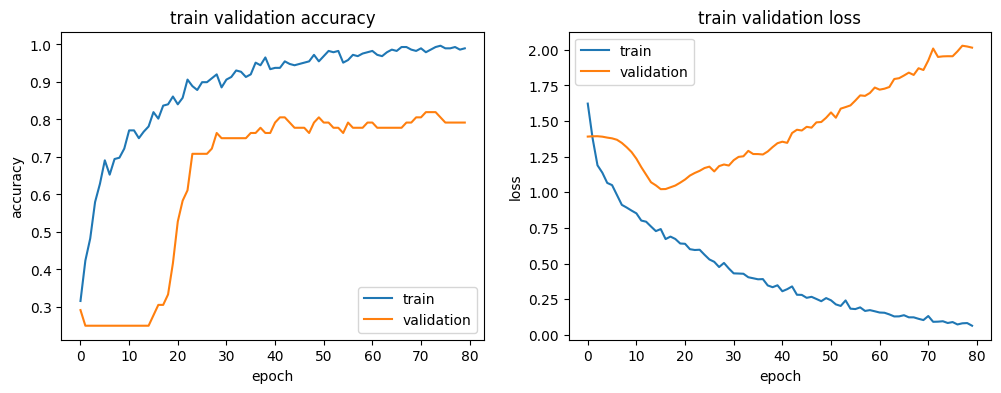

In [102]:
# Train and Validation accuracy and loss
f = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.title('train validation accuracy')
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(1,2,2)
plt.title('train validation loss')
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [103]:
y_prob = model1.predict(X1_test_scaled)
y_pred = np.argmax(y_prob, axis = -1)

6/6 [==============================] - 0s 4ms/step


In [104]:
# Accuracy
acc_1d = round(accuracy_score(y_pred,y1_test),2)

In [105]:
cm_1d = confusion_matrix(y1_test,y_pred)
cm_display_1d = ConfusionMatrixDisplay(confusion_matrix = cm_1d, display_labels = ['Angry', 'Happy', 'Relaxed', 'Sad'])

              precision    recall  f1-score   support

       Angry       0.66      0.64      0.65        45
       Happy       0.44      0.44      0.44        45
     Relaxed       0.44      0.62      0.52        45
         Sad       0.54      0.33      0.41        45

    accuracy                           0.51       180
   macro avg       0.52      0.51      0.51       180
weighted avg       0.52      0.51      0.51       180



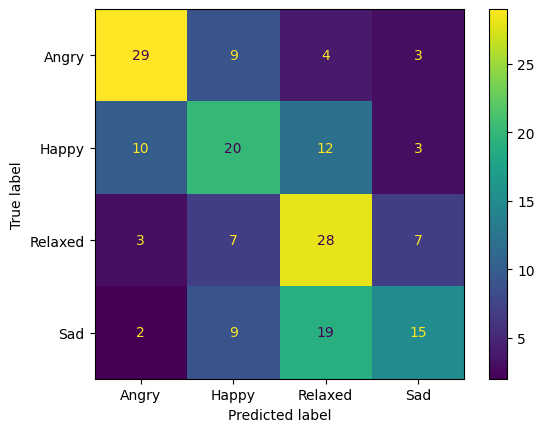

In [106]:
print(classification_report(y1_test, y_pred, target_names = ['Angry', 'Happy', 'Relaxed', 'Sad']))
cm_display_1d.plot()
plt.show()

Text(0, 0.5, 'loss')

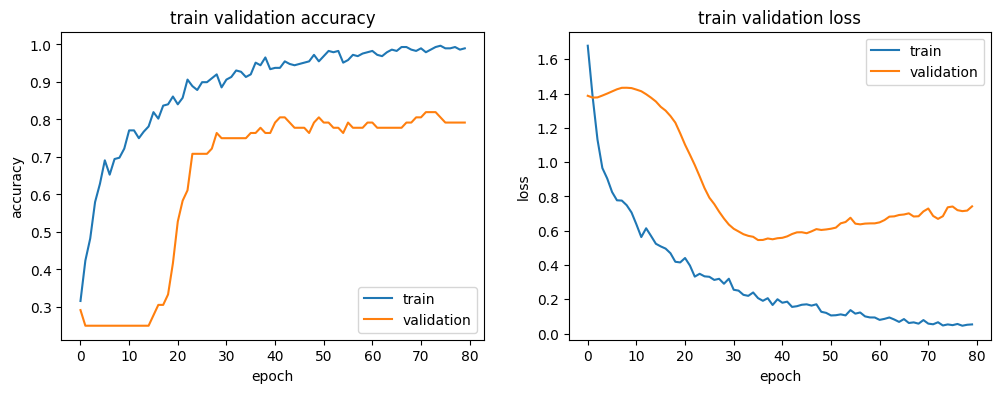

In [107]:
# Train and Validation accuracy and loss
f = plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.title('train validation accuracy')
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')


plt.subplot(1,2,2)
plt.title('train validation loss')
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [108]:
y_prob = model11.predict(X2_test_scaled)
y_pred = np.argmax(y_prob, axis = -1)

2/2 [==============================] - 0s 4ms/step


In [109]:
# Accuracy
acc_1d = round(accuracy_score(y_pred,y2_test),2)

In [110]:
# Confusion Matrix
cm_1d = confusion_matrix(y2_test,y_pred)
cm_display_1d = ConfusionMatrixDisplay(confusion_matrix = cm_1d, display_labels = ['Angry', 'Happy', 'Relaxed', 'Sad'])

In [111]:
model11.save('Features1D/Model/Conv1D.h5')

              precision    recall  f1-score   support

       Angry       0.90      0.90      0.90        10
       Happy       0.77      1.00      0.87        10
     Relaxed       0.78      0.70      0.74        10
         Sad       0.88      0.70      0.78        10

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



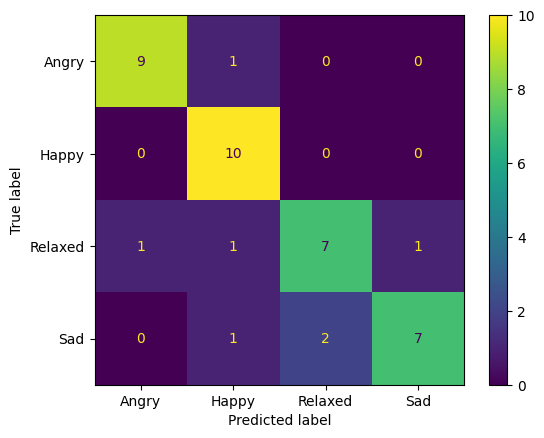

In [112]:
print(classification_report(y2_test, y_pred, target_names = ['Angry', 'Happy', 'Relaxed', 'Sad']))
cm_display_1d.plot()
plt.show()